# TF-IDF Encoding

In [0]:
s2 = "cell lung cancer heterogeneous mutations"
s3 = "novel mechanism pathogenetic mutations cancer"
s5 = "recurrent coding mutations human cancer genes"

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
encoding = TfidfVectorizer()
tfidf = encoding.fit_transform([ s2,s3,s5])

In [0]:
print(encoding.get_feature_names())

['cancer', 'cell', 'coding', 'genes', 'heterogeneous', 'human', 'lung', 'mechanism', 'mutations', 'novel', 'pathogenetic', 'recurrent']


In [0]:
print(tfidf.toarray())

[[0.30714405 0.52004008 0.         0.         0.52004008 0.
  0.52004008 0.         0.30714405 0.         0.         0.        ]
 [0.30714405 0.         0.         0.         0.         0.
  0.         0.52004008 0.30714405 0.52004008 0.52004008 0.        ]
 [0.27249889 0.         0.46138073 0.46138073 0.         0.46138073
  0.         0.         0.27249889 0.         0.         0.46138073]]


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import normalize
from scipy.sparse import hstack

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/DataSet.csv')

In [0]:
data.head()

,Unnamed: 0,ID,Gene,Variation,Class,TEXT
0,0,0,FAM58A,Truncating Mutations,1,cyclin-dependent kinases cdks regulate variety...
1,1,1,CBL,W802*,2,abstract background non-small cell lung cancer...
2,2,2,CBL,Q249E,2,abstract background non-small cell lung cancer...
3,3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b-lineag...


In [0]:
data = data.drop([data.columns[0]], axis=1)

In [0]:
data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin-dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non-small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non-small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b-lineag...


In [0]:
#data['Com'] = data['Gene'].str.cat(data['Variation'],sep=" ").str.cat(data['TEXT'],sep=" ")
data['Com'] = data[ [data.columns[1], data.columns[2], data.columns[4]] ].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

In [0]:
data.head()

,ID,Gene,Variation,Class,TEXT,Com
0,0,FAM58A,Truncating Mutations,1,cyclin-dependent kinases cdks regulate variety...,FAM58A Truncating Mutations cyclin-dependent k...
1,1,CBL,W802*,2,abstract background non-small cell lung cancer...,CBL W802* abstract background non-small cell l...
2,2,CBL,Q249E,2,abstract background non-small cell lung cancer...,CBL Q249E abstract background non-small cell l...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D recent evidence demonstrated acquire...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b-lineag...,CBL L399V oncogenic mutations monomeric casita...


# Gene TF-IDF Encoding

In [0]:
coding = TfidfVectorizer()
tfidf = coding.fit_transform(data['Com'])
tfidf = normalize(tfidf, axis=0)

In [0]:
Gene = [ "CBL" , "MSH6", "CBL","TERT", "DICER1","FAM58A" ]

In [0]:
gene_tfidf = coding.transform(Gene)

In [0]:
gene_tfidf.shape

(6, 153719)

In [0]:
codingG = TfidfVectorizer()
tfidfG = codingG.fit_transform(data['Gene'])
tfidfG = normalize(tfidf, axis=0)

In [0]:
gene_tfidf = codingG.transform(Gene)

In [0]:
print(gene_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
name = codingG.get_feature_names()

In [0]:
val = gene_tfidf.toarray()

In [0]:
val.shape

(6, 263)

In [0]:
for i in range(6):
  for j in range(263):
      if val[i][j] != 0.0:
        print( name[j],val[i][j]),
  print()

cbl 1.0

msh6 1.0

cbl 1.0

tert 1.0

dicer1 1.0

fam58a 1.0



In [0]:
label = [ 'Naive Bayes', 'Random Forest','Logistic Regression','SVM' ]
accu1 = [59.69, 56.54, 62.25, 64.21]
accu2 = [64.36, 64.81, 67.27, 66.46] # 54.88 65.56



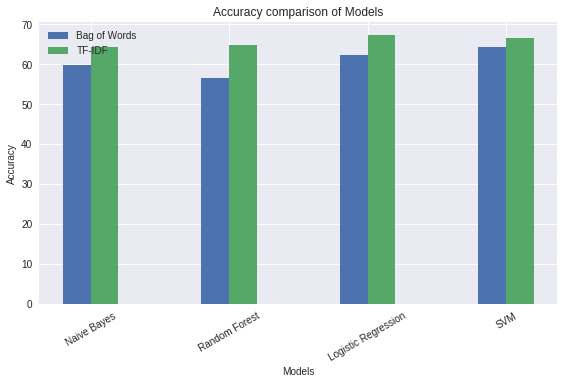

In [0]:
index = np.arange(len(label))

fig, ax = plt.subplots()
bow = plt.bar(index, accu1, 0.2, label='Bag of Words')

tfidf = plt.bar(index + 0.2, accu2, 0.2, label='TF-IDF')

plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(index + 0.1, label, fontsize=10, rotation=30)
plt.legend()
plt.title('Accuracy comparison of Models')

plt.tight_layout()
plt.show()

In [0]:
class MySentences(object):
    """MySentences is a generator to produce a list of tokenized sentences 
    
    Takes a list of numpy arrays containing documents.
    
    Args:
        arrays: List of arrays, where each element in the array contains a document.
    """
    def __init__(self, *arrays):
        self.arrays = arrays
 
    def __iter__(self):
        for array in self.arrays:
            for document in array:
                for sent in nltk.sent_tokenize(document):
                    yield nltk.word_tokenize(sent)

In [0]:
def get_word2vec(sentences, location):
    """Returns trained word2vec
    
    Args:
        sentences: iterator for sentences
        
        location (str): Path to save/load word2vec
    """
    if os.path.exists(location):
        print('Found {}'.format(location))
        model = gensim.models.Word2Vec.load(location)
        return model
    
    print('{} not found. training model'.format(location))
    model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)
    print('Model done training. Saving to disk')
    model.save(location)
    return model

In [0]:
import os
import gensim
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
w2vec = get_word2vec(
    MySentences(
        data['Com'].values, 
        #df_test['Text'].values  Commented for Kaggle limits
    ),
    '/content/gdrive/My Drive/w2vmodel'
)

/content/gdrive/My Drive/w2vmodel not found. training model
Model done training. Saving to disk


In [0]:
class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def fit_transform(self, X, y=None):
        return self.transform(X)


In [0]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(w2vec)
mean_embedded = mean_embedding_vectorizer.fit_transform(data['Com'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [0]:
type(mean_embedded)

numpy.ndarray

In [0]:
print(mean_embedded)

[[ 0.2716334  -0.66462225  0.424845   ... -0.1480839   0.4292677
  -0.32471913]
 [ 0.25497678  0.06302332  0.2460545  ... -0.06499818 -0.2883013
  -0.2813834 ]
 [ 0.25497678  0.06302332  0.2460545  ... -0.06499818 -0.2883013
  -0.2813834 ]
 ...
 [-0.10155828  0.5881262   0.54256684 ...  0.06147902  0.15171035
  -0.76570714]
 [-0.7312386  -0.1495605   0.10963941 ...  0.6942723  -0.22127965
  -0.32637694]
 [-0.5590612  -0.29050413  0.14273244 ...  0.4926847  -0.18845849
  -0.441663  ]]


In [0]:
mean_embedded.shape

(3321, 100)

In [0]:
def evaluate_features(X, y, clf=None):
    """General helper function for evaluating effectiveness of passed features in ML model
    
    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation
    
    Args:
        X (array-like): Features array. Shape (n_samples, n_features)
        
        y (array-like): Labels array. Shape (n_samples,)
        
        clf: Classifier to use. If None, default Log reg is use.
    """
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    print( confusion_matrix(y, preds) )


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [0]:
evaluate_features(mean_embedded, data['Class'].values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Log loss: 1.6705530955589842
Accuracy: 0.3980728696175851
[[182  32  19 138  68  58  70   0   1]
 [ 20 135   0  16   7  11 263   0   0]
 [  5   4   0  16  16   2  46   0   0]
 [198  16  26 256  46  34 106   0   4]
 [ 39   9   0  33  74  26  57   0   4]
 [ 52  27   2  41  11  90  52   0   0]
 [ 34 227   0  67  29  13 582   0   1]
 [  4   5   0   1   0   0   6   0   3]
 [  9   0   0  19   1   0   5   0   3]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


In [0]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import SGDClassifier

In [0]:

evaluate_features(mean_embedded, data['Class'].values.ravel(),
                  RandomForestClassifier(n_estimators=1000, max_depth=15, verbose=1))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Log loss: 1.9803245420555722
Accuracy: 0.42035531466425774
[[178  34   2 146  66  44  97   0   1]
 [ 28 113   0  23   5   0 283   0   0]
 [  9   1  11  17  17   9  25   0   0]
 [192  16   7 273  31  30 134   0   3]
 [ 55   8   1  26  65  26  57   0   4]
 [ 53   7   1  48  11  84  71   0   0]
 [ 35 151  22  52  16   4 669   0   4]
 [  5   3   0   0   0   0   9   0   2]
 [ 15   1   0  11   1   0   4   2   3]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.0s finished


In [0]:
evaluate_features(mean_embedded, 
                  data['Class'].values.ravel(),
                  XGBClassifier(max_depth=4,
                                objective='multi:softprob',
                                learning_rate=0.03333,
                                )
                 )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Log loss: 1.5967361773062778
Accuracy: 0.41854862993074377
[[192  32   1 133  58  30 118   1   3]
 [ 31 101   0  16   6   1 293   4   0]
 [  3   6   9  11   7  16  37   0   0]
 [164  15   7 236  49  74 137   0   4]
 [ 52  10   4  35  57  22  57   0   5]
 [ 54  15   1  52  12  71  69   0   1]
 [ 43 103  12  41  15  10 721   3   5]
 [  4   3   0   1   0   0   9   0   2]
 [ 13   1   0   5   1   0  12   2   3]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.5s finished


In [0]:
evaluate_features(mean_embedded, 
                  data['Class'].values.ravel(),
                  SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=32 ,max_iter=1000, tol=0.0001)
                 )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Log loss: 1.722232908123017
Accuracy: 0.3571213489912677
[[169  26  26  98  62 101  43  20  23]
 [ 33 121   2  12  11  29 217  22   5]
 [  4   3   2  11  23   4  42   0   0]
 [187  10  22 193 121  58  74   8  13]
 [ 36   9   4  29  66  44  44   5   5]
 [ 52  15   2  38   8 107  48   5   0]
 [ 34 202  19  49  44  71 507  22   5]
 [  0   4   0   0   0   1   5   5   4]
 [  5   1   0   1   0   0   0  14  16]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


In [0]:
type(w2vec)

gensim.models.word2vec.Word2Vec

In [0]:
evaluate_features(mean_embedded, 
                  data['Class'].values.ravel(),
                  BernoulliNB()
                 )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Log loss: 4.209067926497187
Accuracy: 0.36495031616982837
[[126  62  20 140  65  64  75   6  10]
 [ 22 214  10  26   3  14 157   4   2]
 [  3   7   0  11  18   9  41   0   0]
 [142  31  26 214  50 101 109   5   8]
 [ 12  19   5  28 108  21  48   1   0]
 [ 32  24   5  46  88  24  53   2   1]
 [ 30 245   9 109   6  18 522   4  10]
 [  4   4   0   0   0   0   8   0   3]
 [ 11   5   0   5   0   0   8   4   4]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished


In [0]:
w2vec.wv.most_similar('mutation')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mutations', 0.8166647553443909),
 ('substitution', 0.6669312119483948),
 ('alteration', 0.5873476266860962),
 ('variant', 0.5802590250968933),
 ('mutational', 0.5723405480384827),
 ('mutant', 0.5517942905426025),
 ('substitutions', 0.5431907176971436),
 ('heterozygous', 0.5414881110191345),
 ('polymorphism', 0.5174976587295532),
 ('3413insg', 0.5166042447090149)]

In [0]:
w2vec.wv.most_similar('cbl')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('c-cbl', 0.6098183393478394),
 ('akt1', 0.4393686354160309),
 ('sf3b1', 0.41318488121032715),
 ('rasa1', 0.41207394003868103),
 ('chek2', 0.4017184376716614),
 ('ddr2', 0.3905982971191406),
 ('jak2', 0.3892483413219452),
 ('tuberin', 0.3884729743003845),
 ('glycosyltransferase', 0.38785043358802795),
 ('runx1', 0.3842223286628723)]

In [0]:
w2vec.wv.most_similar('tert')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hypermethylation', 0.5478111505508423),
 ('mgmt', 0.5182145833969116),
 ('-ctgtcgtccggtctggg-3', 0.5139822363853455),
 ('island', 0.5095973014831543),
 ('ccnd1', 0.4937363862991333),
 ('epcam', 0.47603172063827515),
 ('ctnnb1', 0.47597092390060425),
 ('methylation-induced', 0.4693474769592285),
 ('2013b', 0.4693194329738617),
 ('mck', 0.4689144492149353)]

In [0]:
w2vec.wv.most_similar('oncogenic')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tumorigenic', 0.641036868095398),
 ('activating', 0.6276898384094238),
 ('transforming', 0.615868091583252),
 ('cooperation', 0.5618832111358643),
 ('tumorigenesis', 0.5403387546539307),
 ('gof', 0.5369025468826294),
 ('oncogene', 0.536821186542511),
 ('malignant', 0.5339166522026062),
 ('gain-of-function', 0.5291383862495422),
 ('oncogenesis', 0.5239866971969604)]

In [0]:
words = list(w2vec.wv.vocab)
print(words)

['Truncating', 'Mutations', 'cyclin-dependent', 'kinases', 'cdks', 'regulate', 'variety', 'fundamental', 'cellular', 'processes', 'cdk10', 'stands', 'one', 'last', 'orphan', 'activating', 'cyclin', 'identified', 'kinase', 'activity', 'revealed', 'previous', 'work', 'shown', 'silencing', 'increases', 'ets2', 'erythroblastosis', 'virus', 'e26', 'oncogene', 'homolog', '2', '-driven', 'activation', 'mapk', 'pathway', 'confers', 'tamoxifen', 'resistance', 'breast', 'cancer', 'cells', 'precise', 'mechanisms', 'modulates', 'generally', 'functions', 'remain', 'elusive', 'demonstrate', 'identifying', 'product', 'fam58a', 'whose', 'mutations', 'cause', 'star', 'syndrome', 'human', 'developmental', 'anomaly', 'features', 'include', 'toe', 'syndactyly', 'telecanthus', 'renal', 'malformations', 'show', 'syndrome-associated', 'mutants', 'unable', 'interact', 'phenocopies', 'increasing', 'c-raf', 'conferring', 'phosphorylates', 'vitro', 'positively', 'controls', 'degradation', 'proteasome', 'protein'

In [0]:
len(words)

78041

In [0]:
w2vec.wv.doesnt_match('mutation')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'n'